# Quickstart notebook #1

Welcome to VerticaPY, in this notebook you'll learn the basic concepts and functions to start doing in-Database Machine Learning.

VerticaPY is a Python library that allows to do Data Science in the Vertica database, without the need to load data in memory.

Through it's integration with jupyter notebook, it's possible to use both python and sql.



In this notebook you'll learn:  
    
    - Data I/O: create a schema and load data to Vertica
    - vDataFrame: what is it and how it works
    - Data Preparation: How to change data types and create dummy variables
    - Data Exploration: compute descriptive statistics and correlations
    - Data Visualization: how to do plots to understand the dataset
    - Modeling: how to train your first model. how to score it and how to make predictions
    - Model Management: the model table and the memmodel


VerticaPY is a Python library that allows to do Data Science in the Vertica database.

Though it's integration with jupyter notebook, it's possible to use both python and sql

## Import libraries

In [2]:
from verticapy import *
from verticapy.connect import *

from verticapy.learn.linear_model import LogisticRegression

## Create auto connection

--> Not sure how we want to proceed on this part, should we skip this?

Since this is the first time we connect to Vertica using VerticaPy, we'll need to create an autoconnection cointaining:

    - the ip address and port of the database, the name of the data
    - the name of the database
    - the credentials that will be used to connect

In [7]:
new_auto_connection({"host": "localhost", 
                     "port": "5433", 
                     "database": "testdb", 
                     "password": "", 
                     "user": "dbadmin"},
                    name = "VerticaDSN")
change_auto_connection("VerticaDSN")

## Data I/O

We can create a schema using SQL statements from the jupyter notebook using SQL Magic

-- when a create_schema() function will be available, there will be no need to use SQL Magic and we can edit this step

Load the SQL extension

In [10]:
%load_ext verticapy.sql

You can now run SQL statements by starting the chunk with '%%SQL'

In [9]:
%%sql
CREATE SCHEMA verticapy_quickstart;

CREATE


We can now load our csv to vertica using the read_csv() function.

The read_csv function automatically:

    - creates a table
    - load the data in the new table

By using the parameter "genSQL = True", it's possible to check the SQL statement that will be used to load the data.

In [10]:
read_csv("qs1_churn.csv", 
         table_name = "qs1_churn",
         schema = "verticapy_quickstart",
         quotechar = '"',
         sep = ",",
         na_rep = "",
         parse_n_lines = 100,
         genSQL = True)

CREATE TABLE "verticapy_quickstart"."qs1_churn"("Churn" Boolean, "tenure" Integer, "Contract" Varchar(28), "MonthlyCharges" Numeric(9,4));
COPY "verticapy_quickstart"."qs1_churn"("Churn", "tenure", "Contract", "MonthlyCharges") FROM {} DELIMITER ',' NULL '' ENCLOSED BY '"' ESCAPE AS '\' SKIP 1;


Using the function again without the "genSQL" parameter will create the table and load the data to Vertica

The table "verticapy_quickstart"."qs1_churn" has been successfully created.


,010ChurnBoolean,123tenureInt,AbcContractVarchar(28),"123MonthlyChargesNumeric(9,4)"
1,❌,0,One year,19.7
2,❌,0,Two year,19.85
3,❌,0,Two year,20.0
4,❌,0,Two year,20.25
5,❌,0,Two year,25.35
6,❌,0,Two year,25.75
7,❌,0,Two year,52.55
8,❌,0,Two year,56.05
9,❌,0,Two year,61.9
10,❌,0,Two year,73.35

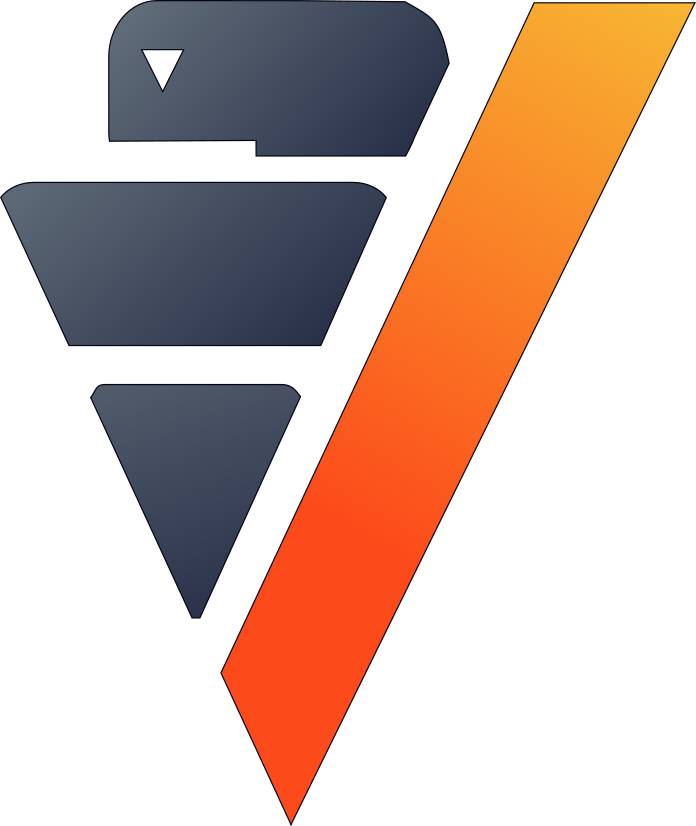

In [11]:
read_csv("../qs1_churn.csv", 
         table_name = "qs1_churn",
         schema = "verticapy_quickstart",
         quotechar = '"',
         sep = ",",
         na_rep = "",
         parse_n_lines = 100)

## The vDataFrame

The vDataFrame is a Python object that allows you to prepare and explore your data without loading in memory or modifying it.

The VdataFrame is a logical connection to table inside the DataBase.

In [8]:
myvdf = vDataFrame(input_relation = 'qs1_churn', schema = 'verticapy_quickstart')

,010ChurnBoolean,123tenureInt,AbcContractVarchar(28),"123MonthlyChargesNumeric(9,4)"
1,❌,0,One year,19.7
2,❌,0,Two year,19.85
3,❌,0,Two year,20.0
4,❌,0,Two year,20.25
5,❌,0,Two year,25.35
6,❌,0,Two year,25.75
7,❌,0,Two year,52.55
8,❌,0,Two year,56.05
9,❌,0,Two year,61.9
10,❌,0,Two year,73.35

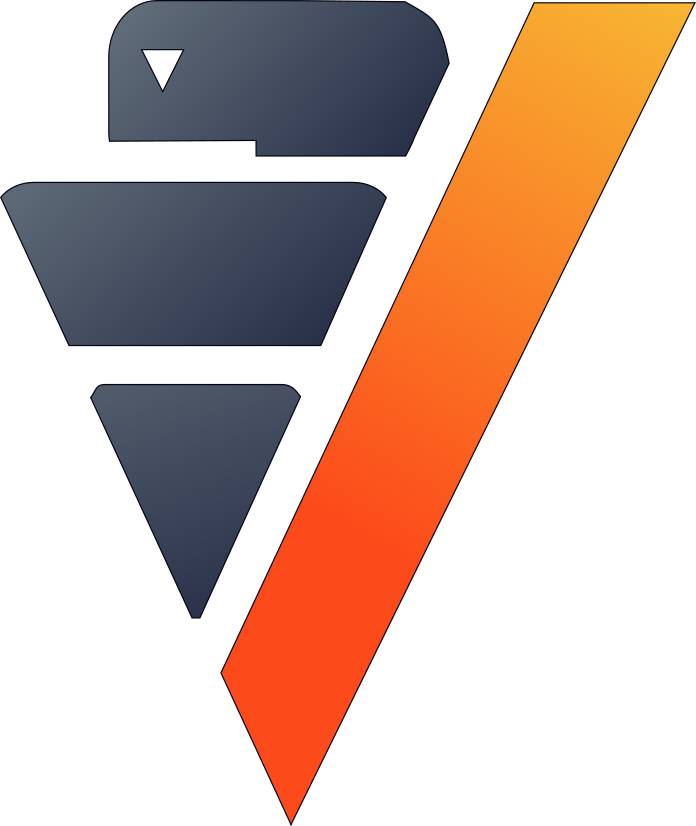

In [24]:
myvdf

Whenever a modification is done on the vDataFrame, the current_relation is updated.

Since we haven't done modifications yet, the current_relation() only shows the schema and name of the table.

In [15]:
print(myvdf.current_relation())

"verticapy_quickstart"."qs1_churn"


## Insert new rows

We can insert new rows in the table using the insert_into function, the function will return the number of rows ingested.

In [17]:
insert_into("verticapy_quickstart.qs1_churn",
           ["Churn", "tenure", "Contract", "MonthlyCharges",],
           [[False, 0, "Month-to-month", 20.5],
            [True, 40, "Two Year", 25]])

2

## Data Preparation

We can check the datatypes of our columns using dtypes()

,dtype
"""Churn""",boolean
"""tenure""",int
"""Contract""",varchar(28)
"""MonthlyCharges""","numeric(9,4)"

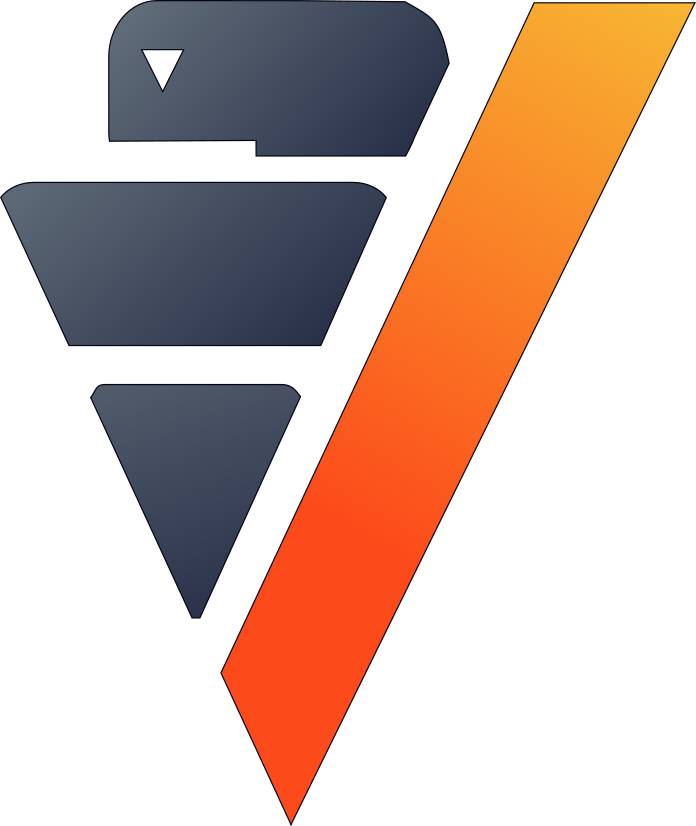

In [16]:
myvdf.dtypes()

The response variable 'Churn' is boolean, we can convert it to numeric using the decode() function

,123ChurnInteger,123tenureInt,AbcContractVarchar(28),"123MonthlyChargesNumeric(9,4)"
1,0,0,One year,19.7
2,0,0,Two year,19.85
3,0,0,Two year,20.0
4,0,0,Two year,20.25
5,0,0,Two year,25.35
6,0,0,Two year,25.75
7,0,0,Two year,52.55
8,0,0,Two year,56.05
9,0,0,Two year,61.9
10,0,0,Two year,73.35

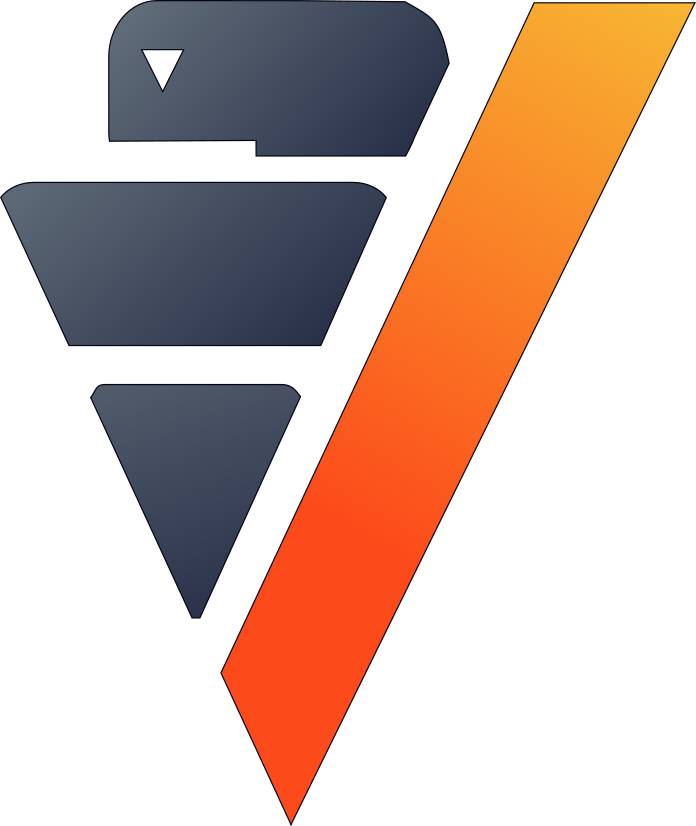

In [43]:
myvdf["Churn"].decode("Yes", 1, 0)

We can get a statistical summary of our dataset using the function describe().

By default, the function describe only returns statistics of numeric columns, we can specify the parameter method = 'All', to get statistics for all variables.

,"123""Churn""Integer100%","123""tenure""Int100%","123""MonthlyCharges""Numeric(9,4)100%","Abc""Contract""Varchar(28)100%"
count,7043,7043,7043,7043
unique,2,73,1585,3
top,0,1,20.05,Month-to-month
top_percent,73.463,8.704,0.866,55.019
avg,0.265369870793695,32.3711486582422,64.7616924605993,11.3011500780917
stddev,0.441561305121947,24.5594810230944,30.0900470976784,2.98505842452654
min,0,0,18.25,8
25%,0,9,35.4714285714286,8
50%,0,29,70.35,14
75%,1,55,89.85,14

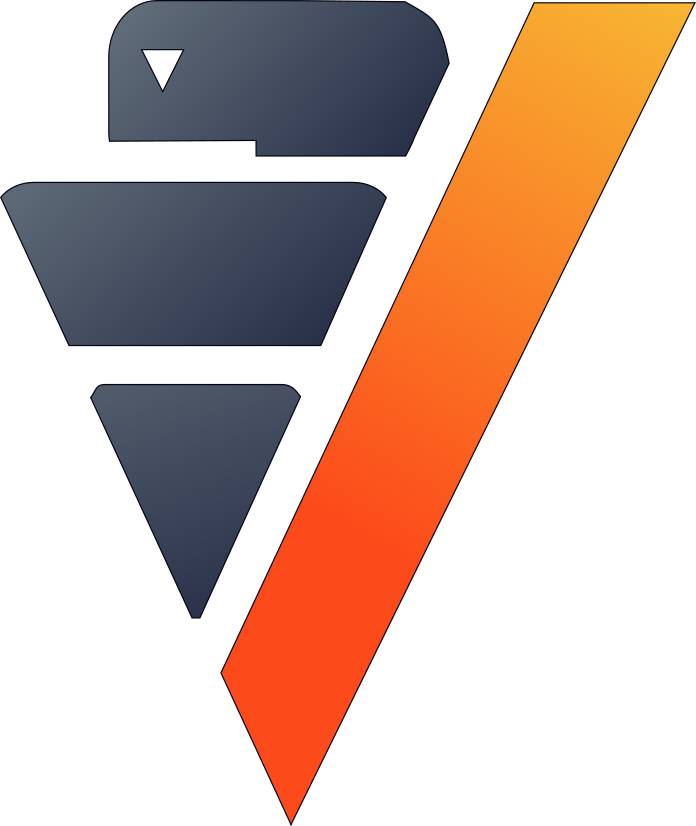

In [21]:
myvdf.describe(method = 'All')

The "Contract" column is a nominal categorical variable (not ordered), a common approach to use nominal variables is to create dummy variables.

We can do that using the function get_dummies()

We also drop the original variable using drop(), since it won't be used for modeling.

,123ChurnInteger,123tenureInt,"123MonthlyChargesNumeric(9,4)",123Contract_Month-to-monthBool,123Contract_One_yearBool,123Contract_Two_YearBool
1,0,0,19.7,0,1,0
2,0,0,19.85,0,0,0
3,0,0,20.0,0,0,0
4,0,0,20.25,0,0,0
5,0,0,25.35,0,0,0
6,0,0,25.75,0,0,0
7,0,0,52.55,0,0,0
8,0,0,56.05,0,0,0
9,0,0,61.9,0,0,0
10,0,0,73.35,0,0,0

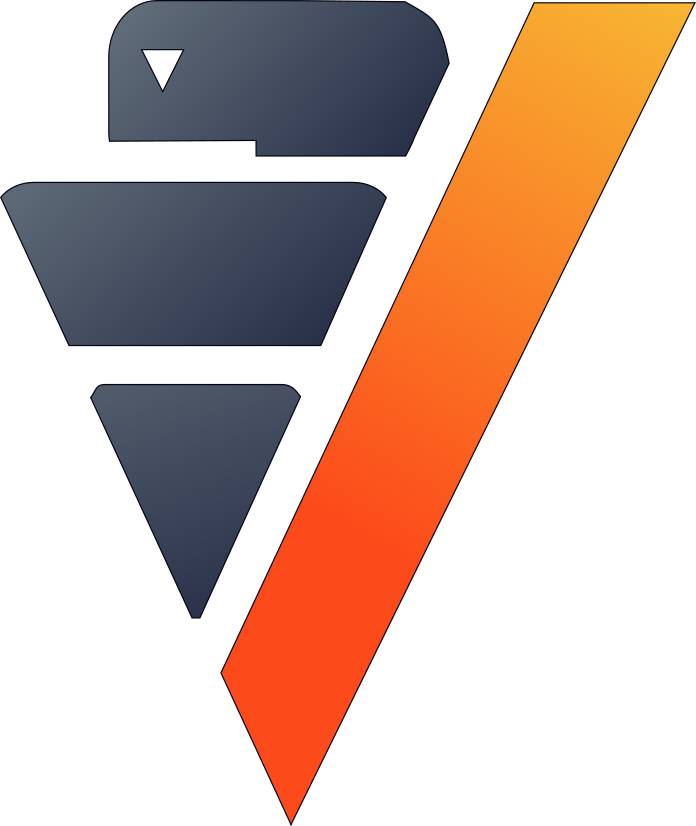

In [44]:
myvdf.get_dummies(columns = ["Contract"]).drop(["Contract"])

We can check how verticaPY updated the "current_relation".

The data in the database was not changed, only the 'current relation query' was updated

In [27]:
print(myvdf.current_relation())

(
   SELECT
     DECODE("Churn", 'Yes', 1, 0) AS "Churn",
     "tenure",
     "MonthlyCharges",
     DECODE("Contract_Month-to-month", 'Month-to-month', 1, 0) AS "Contract_Month-to-month",
     DECODE("Contract_One_year", 'One year', 1, 0) AS "Contract_One_year" 
   FROM
 (
   SELECT
     "Churn",
     "tenure",
     "MonthlyCharges",
     "Contract" AS "Contract_Month-to-month",
     "Contract" AS "Contract_One_year" 
   FROM
 "verticapy_quickstart"."qs1_churn") 
VERTICAPY_SUBTABLE) 
VERTICAPY_SUBTABLE


## Data Exploration

Get information about the number of rows and columns of the vDataFrame

In [27]:
myvdf.shape()

(7045, 6)

Compute correlations

,"""Churn""","""tenure""","""MonthlyCharges""","""Contract_Month-to-month""","""Contract_One_year"""
"""Churn""",1.0,-0.352228670113078,0.193356422237845,0.40510291068799,-0.177820018349908
"""tenure""",-0.352228670113078,1.0,0.247899856286155,-0.64556142326607,0.202570475449418
"""MonthlyCharges""",0.193356422237845,0.247899856286155,1.0,0.0601653271277327,0.00490383941502052
"""Contract_Month-to-month""",0.40510291068799,-0.64556142326607,0.0601653271277327,1.0,-0.568744281198699
"""Contract_One_year""",-0.177820018349908,0.202570475449418,0.00490383941502052,-0.568744281198699,1.0

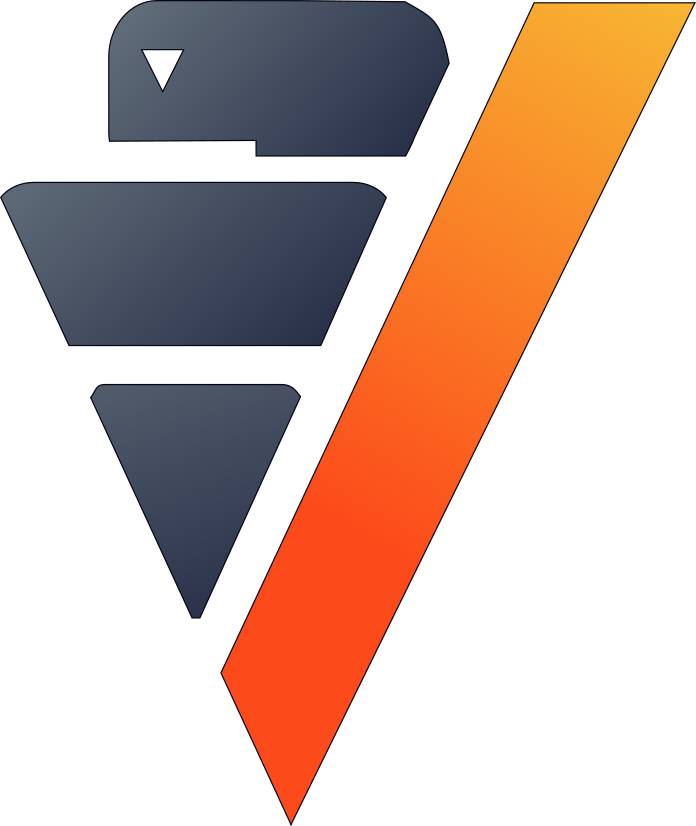

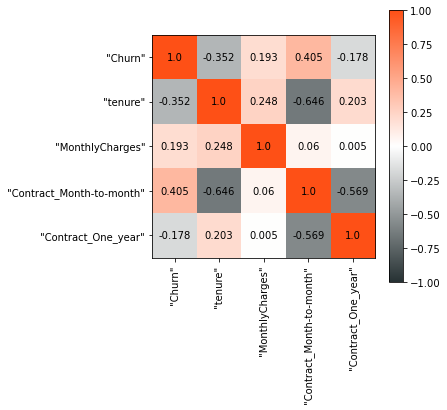

In [25]:
myvdf.corr()

## Data Visualization

We can try to understand better the data using visualizations.

<AxesSubplot:xlabel='"MonthlyCharges"', ylabel='"tenure"'>

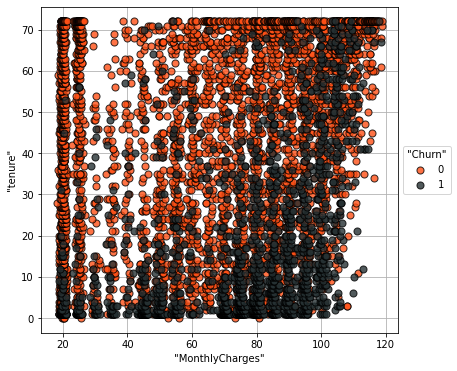

In [71]:
myvdf.scatter(["MonthlyCharges", "tenure"], catcol = "Churn")

From this first plot we can see that:

    -for low tenure there are many churning customers
    -at higher tenure, higher monthly charges get a higher concentration of churning customers

<AxesSubplot:xlabel='"Contract_Month-to-month"', ylabel='avg("Churn")'>

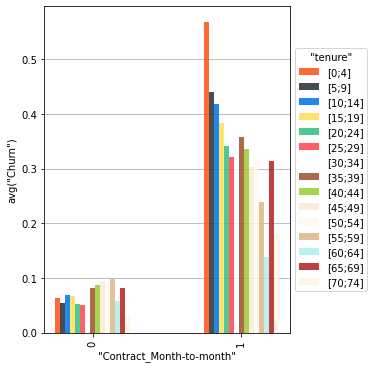

In [68]:
# No lock-in = Churn
myvdf.hist(["Contract_Month-to-month", "tenure"], method = "avg", of = "Churn")

in this second plot, it's clear that having a "month-to-month" contract, is associated to higher churning ratio.

Lock-in contracts, would allow to reduce customer churn.

## Modeling

A common practice to be able to avoid overfitting is to split the dataset in train and test dataset.

We can do so using the train_test_split, by using the parameter 'random_state' it's possible to fix the random seed to be able to reproduce the results.

In [45]:
train, test = myvdf.train_test_split(test_size = 0.2, 
                                     random_state = 0)

Every model trained in Vertica, is saved to the database using the model name defined when initializing the model.

We initialize a Logistic Regression, specifying the name "churn_qs" and some parameters for our logistic regression like max iterations and solver.

In [46]:
model = LogisticRegression("churn_qs", 
                           penalty = 'L2', 
                           tol = 1e-6, 
                           max_iter = 1000, 
                           solver = "BFGS")

If a model with the same name already exists in Vertica, the fit() method will return an error.

To avoid this, We can drop it using the drop() method before fitting the model.

The fit function also allow to specify a test dataset, which will be used to measure the performance of the model (to avoid overfitting the train dataset).

In [33]:
model.drop()
model.fit(train, 
          myvdf.get_columns(exclude_columns = ["Churn"]), 
          'Churn',
          test)



details
       predictor       |coefficient|std_err | z_value |p_value 
-----------------------+-----------+--------+---------+--------
       Intercept       | -3.61048  | 0.17894|-20.17749| 0.00000
        tenure         | -0.03608  | 0.00185|-19.50083| 0.00000
    monthlycharges     |  0.02871  | 0.00136|21.12313 | 0.00000
contract_month-to-month|  1.96821  | 0.15756|12.49204 | 0.00000
   contract_one_year   |  0.92493  | 0.17074| 5.41712 | 0.00000
   contract_two_year   |  0.00000  | 1.00000| 0.00000 | 1.00000


regularization
type| lambda 
----+--------
 l2 | 1.00000


call_string
logistic_reg('public.churn_qs', '"public"._VERTICAPY_TEMPORARY_VIEW_dbadmin_24504', '"churn"', '"tenure", "MonthlyCharges", "Contract_Month-to-month", "Contract_One_year", "Contract_Two_Year"'
USING PARAMETERS optimizer='bfgs', epsilon=1e-06, max_iterations=1000, regularization='l2', lambda=1, alpha=0.5)

Additional Info
       Name       |Value
------------------+-----
 iteration_count  | 13  
rejecte

By looking at the output, we can see that the p_value for the column "contract_two_year" is bigger than 0.05, also, it has high standard error. We can train the model again excluding the "contract_two_year" variable.

In [47]:
model.drop()
model.fit(train, 
          myvdf.get_columns(exclude_columns = ["Churn", "contract_two_year"]), 
          'Churn',
          test)



details
       predictor       |coefficient|std_err | z_value |p_value 
-----------------------+-----------+--------+---------+--------
       Intercept       | -3.50844  | 0.17457|-20.09814| 0.00000
        tenure         | -0.03561  | 0.00185|-19.28580| 0.00000
    monthlycharges     |  0.02878  | 0.00137|20.95411 | 0.00000
contract_month-to-month|  1.86493  | 0.15312|12.17945 | 0.00000
   contract_one_year   |  0.88095  | 0.16419| 5.36554 | 0.00000


regularization
type| lambda 
----+--------
 l2 | 1.00000


call_string
logistic_reg('public.churn_qs', '"public"._VERTICAPY_TEMPORARY_VIEW_dbadmin_8480', '"churn"', '"tenure", "MonthlyCharges", "Contract_Month-to-month", "Contract_One_year"'
USING PARAMETERS optimizer='bfgs', epsilon=1e-06, max_iterations=1000, regularization='l2', lambda=1, alpha=0.5)

Additional Info
       Name       |Value
------------------+-----
 iteration_count  | 13  
rejected_row_count|  0  
accepted_row_count|5637 

Once the model is trained, we can start checking some metrics to understand the performance.

,value
auc,0.8307970134306377
prc_auc,0.6572094162016464
accuracy,0.7789623312011372
log_loss,0.194093578621839
precision,0.65625
recall,0.4713216957605985
f1_score,0.548621190130624
mcc,0.4172212563970687
informedness,0.3729121530170598
markedness,0.46679512957998215

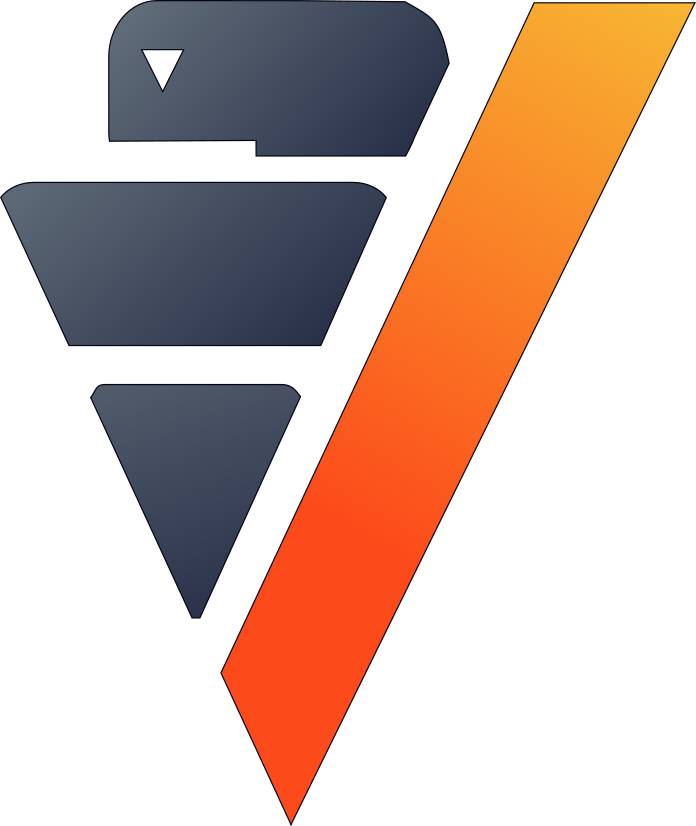

In [36]:
model.classification_report()

the Area under the Curve (auc) is 0.83 and the accuracy is 0.78.

We can get the confusion matrix to better understand the miss-classifications of our model.

By default, the confusion matrix will use 0.5 as cutoff value.

,0,1
0,907,99
1,212,189

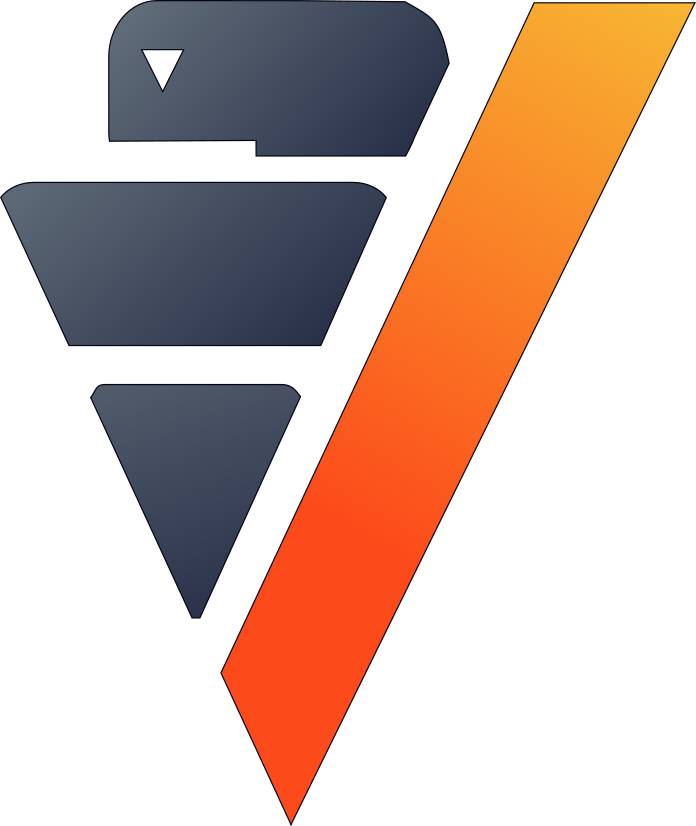

In [37]:
model.confusion_matrix()

At last, we can use our model to make predictions.

If no cutoff is specified, the predict function will return the probabilities.

,123ChurnInteger,123tenureInt,"123MonthlyChargesNumeric(9,4)",123Contract_Month-to-monthBool,123Contract_One_yearBool,123Contract_Two_YearBool,123predictionInteger
1,0,0,19.7,0,1,0,0
2,0,0,19.85,0,0,0,0
3,0,0,20.0,0,0,0,0
4,0,0,20.25,0,0,0,0
5,0,0,25.35,0,0,0,0
6,0,0,25.75,0,0,0,0
7,0,0,52.55,0,0,0,0
8,0,0,56.05,0,0,0,0
9,0,0,61.9,0,0,0,0
10,0,0,73.35,0,0,0,0

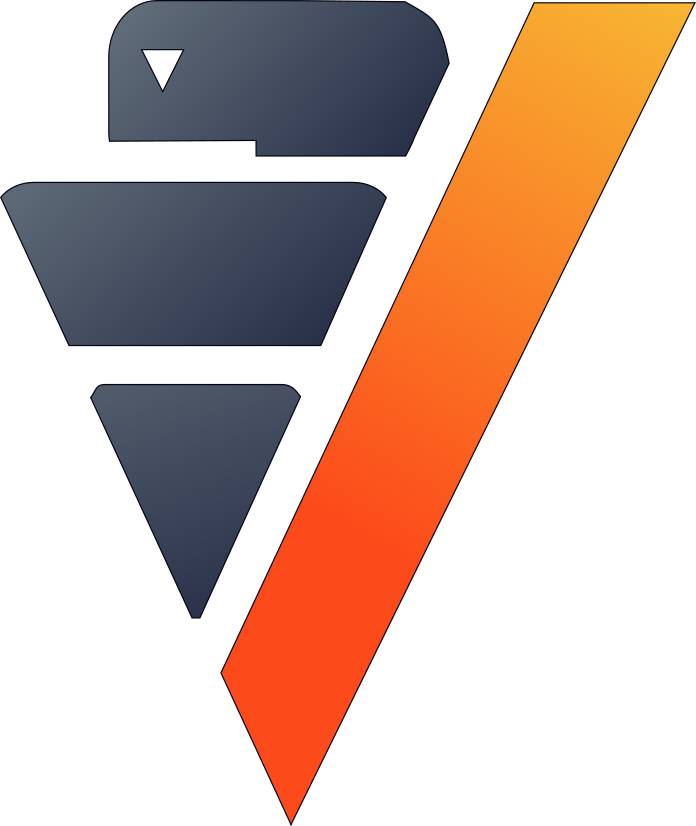

In [54]:
model.predict(myvdf, name = "prediction", cutoff = 0.5)

,123ChurnInteger,123tenureInt,"123MonthlyChargesNumeric(9,4)",123Contract_Month-to-monthBool,123Contract_One_yearBool,123Contract_Two_YearBool,123predictionInteger,123prediction_probFloat
1,0,0,19.7,0,1,0,0,0.107177780009744
2,0,0,19.85,0,0,0,0,0.0456282523104831
3,0,0,20.0,0,0,0,0,0.0458161713450073
4,0,0,20.25,0,0,0,0,0.0461310079728457
5,0,0,25.35,0,0,0,0,0.0530201962235666
6,0,0,25.75,0,0,0,0,0.0535998258125828
7,0,0,52.55,0,0,0,0,0.108940222517106
8,0,0,56.05,0,0,0,0,0.119085712785547
9,0,0,61.9,0,0,0,0,0.137863924638109
10,0,0,73.35,0,0,0,0,0.181772796425572

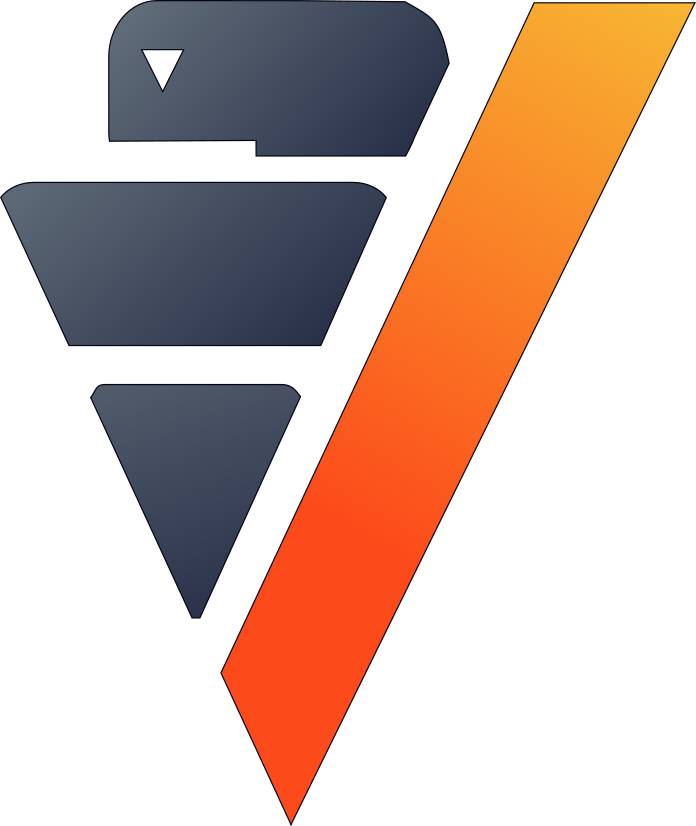

In [55]:
model.predict(myvdf, name = "prediction_prob")

the score function allows to compute many performance metrics of the model, like auc or accuracy, by passing the response column and the predicted value of our model.

In [58]:
myvdf.score(y_true= "Churn", y_score ="prediction", method = "accuracy")

0.787934705464869

If we pass the prediction probability instead of the predicted value, we can also use the score function to find the cutoff that maximizes the Area under the Curve.

In [56]:
myvdf.score(y_true= "Churn", y_score ="prediction_prob", method = "best_cutoff")

0.233333333333333

## Model Management

All models are saved in the database, we can retrieve metadata of the model from the models table.

,123model_idInteger,Abcmodel_nameVarchar(128),123schema_idInteger,Abcschema_nameVarchar(128),123owner_idInteger,Abcowner_nameVarchar(128),AbccategoryVarchar(128),Abcmodel_typeVarchar(128),010is_completeBoolean,📅create_timeTimestamp with timezone,123sizeInteger
1,45035996274133218,churn_qs,45035996273704982,public,45035996273704962,dbadmin,VERTICA_MODELS,LOGISTIC_REGRESSION,✅,2022-04-08 17:35:11.032926+02:00,2340

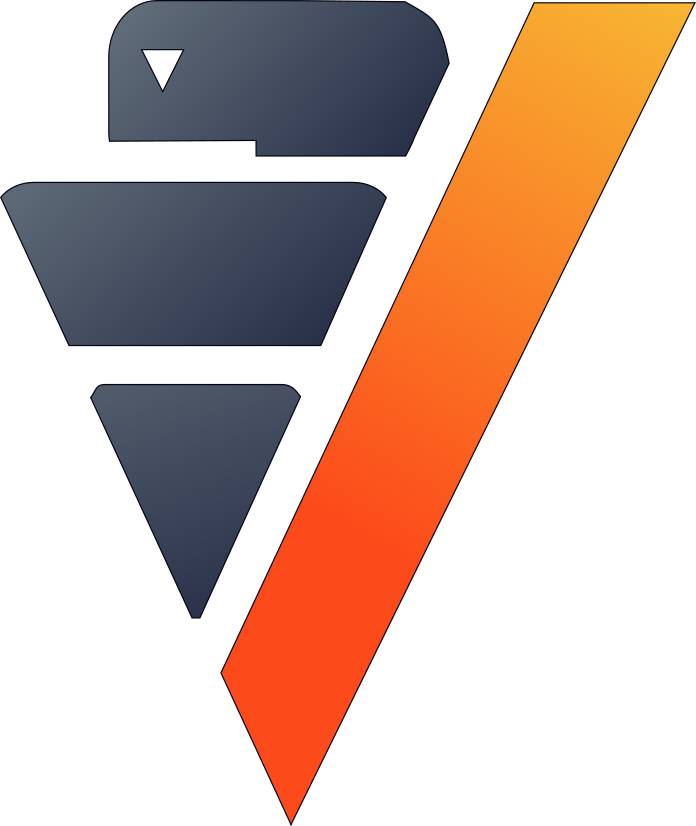

In [25]:
%%sql
select * from models where model_name = 'churn_qs'

We can use both SQL or Python to access the parameters of the trained model.

,Abcattr_nameVarchar(128),AbcLong varchar(32000000),123#_of_rowsInteger
1,details,,5
2,regularization,,1
3,iteration_count,,1
4,rejected_row_count,,1
5,accepted_row_count,,1
6,call_string,,1

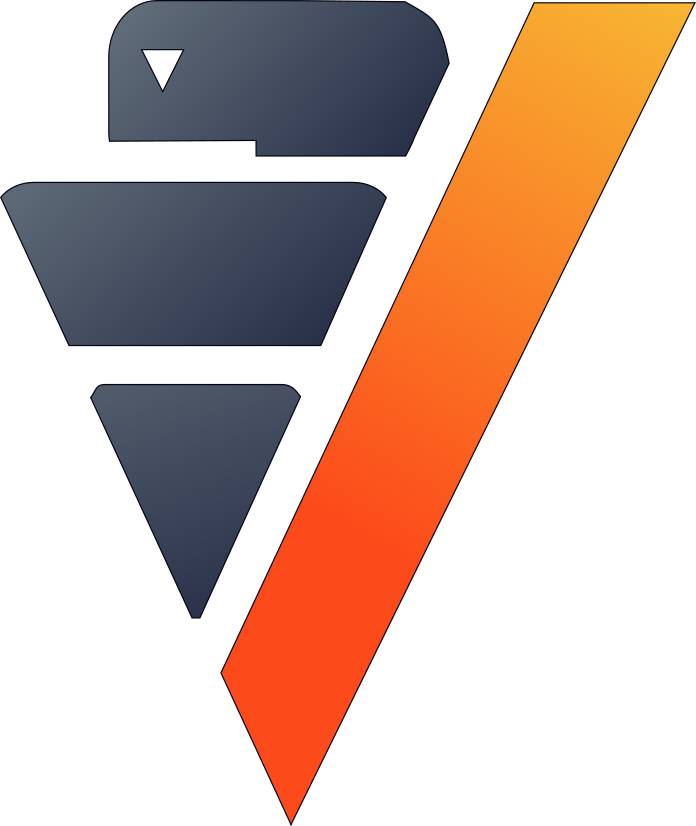

In [26]:
%%sql
SELECT GET_MODEL_ATTRIBUTE(USING PARAMETERS model_name= 'churn_qs');

,AbcpredictorVarchar(65000),123coefficientFloat,123std_errFloat,123z_valueFloat,123p_valueFloat
1,Intercept,-3.50844410255922,0.174565639963828,-20.0981367426385,7.66166356272845e-90
2,tenure,-0.0356054696796082,0.00184620160620134,-19.285797152386,7.06918913857261e-83
3,monthlycharges,0.0287824014390618,0.001373592442777,20.9541058488006,1.7213130535201e-97
4,contract_month-to-month,1.86493105135086,0.15312114087175,12.1794485120305,3.99977251011215e-34
5,contract_one_year,0.880954842120112,0.164187563156379,5.36553941836055,8.07076511676042e-08

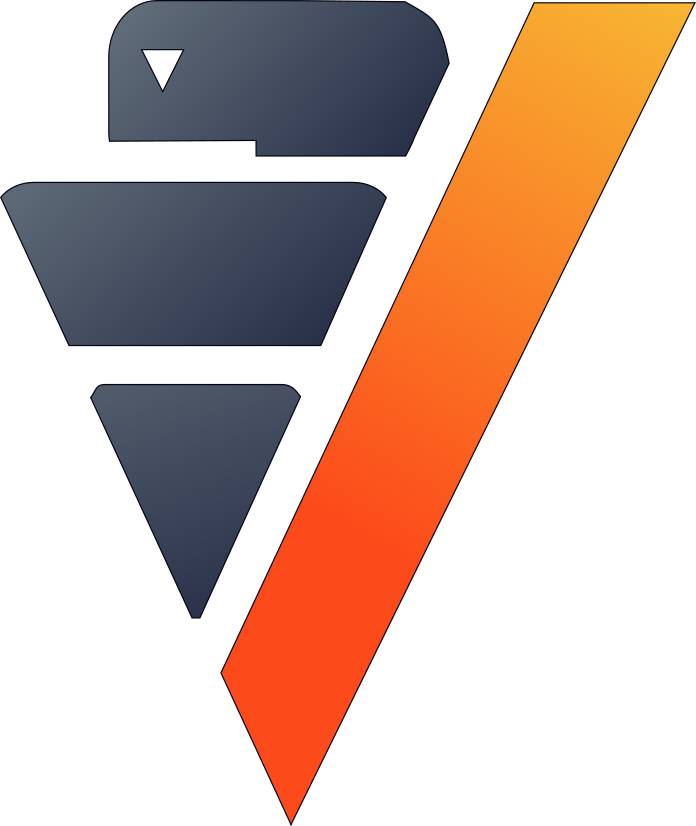

In [57]:
%%sql
SELECT GET_MODEL_ATTRIBUTE(USING PARAMETERS model_name= 'churn_qs' , attr_name='details');

,Abcattr_nameVarchar(128),AbcLong varchar(32000000),123#_of_rowsInteger
1,details,,5
2,regularization,,1
3,iteration_count,,1
4,rejected_row_count,,1
5,accepted_row_count,,1
6,call_string,,1

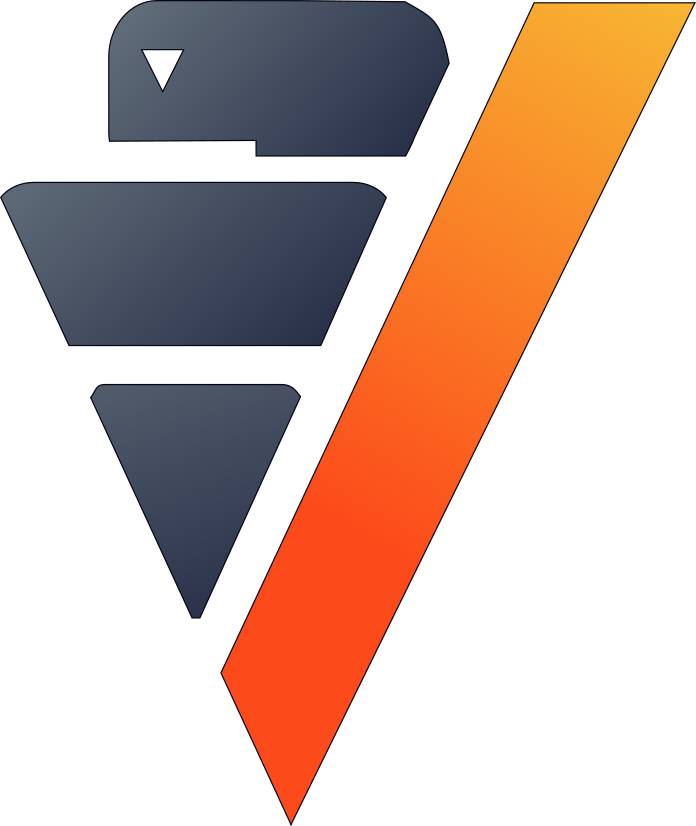

In [30]:
model.get_attr()

,AbcpredictorVarchar(65000),123coefficientFloat,123std_errFloat,123z_valueFloat,123p_valueFloat
1,Intercept,-3.50844410255922,0.174565639963828,-20.0981367426385,7.66166356272845e-90
2,tenure,-0.0356054696796082,0.00184620160620134,-19.285797152386,7.06918913857261e-83
3,monthlycharges,0.0287824014390618,0.001373592442777,20.9541058488006,1.7213130535201e-97
4,contract_month-to-month,1.86493105135086,0.15312114087175,12.1794485120305,3.99977251011215e-34
5,contract_one_year,0.880954842120112,0.164187563156379,5.36553941836055,8.07076511676042e-08

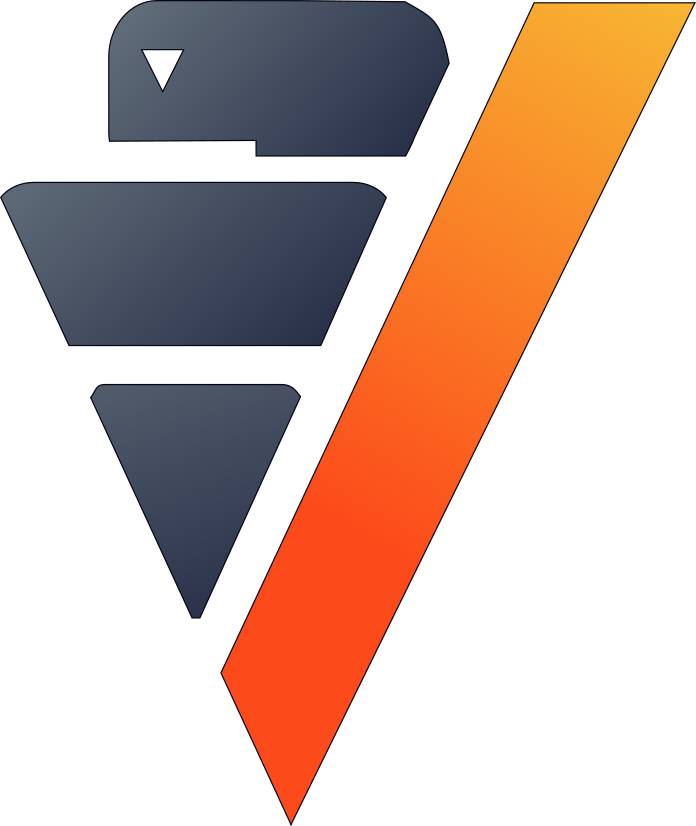

In [56]:
model.get_attr("details")

deploySQL() returns the vSQL query to predict using the model

In [48]:
display(model.deploySQL())

'PREDICT_LOGISTIC_REG("tenure", "MonthlyCharges", "Contract_Month-to-month", "Contract_One_year" USING PARAMETERS model_name = \'churn_qs\', type = \'probability\', match_by_pos = \'true\')'

The memmodel object allows to deploy the model outside of Vertica. 

In [49]:
mmodel = model.to_memmodel()

In [50]:
mmodel

<LogisticRegression>

coefficients = [-0.03560547  0.0287824   1.86493105  0.88095484]

intercept = -3.50844410255922

It's possible to do prediction both using SQL or in memory (in any python environment, similarly to Python Pickle).

Is possible to predict both the response and the probabilities.

In [55]:
mmodel.predict_sql(["tenure", 
                    "monthlycharges", 
                    "contract_month-to-month",
                    "contract_one_year"])

'((1 / (1 + EXP(- (-3.50844410255922 + -0.0356054696796082 * tenure + 0.0287824014390618 * monthlycharges + 1.86493105135086 * contract_month-to-month + 0.880954842120112 * contract_one_year)))) > 0.5)::int'

In [67]:
mmodel.predict_proba_sql(["tenure", 
                    "monthlycharges", 
                    "contract_month-to-month",
                    "contract_one_year"])

['1 - (1 / (1 + EXP(- (-3.50844410255922 + -0.0356054696796082 * tenure + 0.0287824014390618 * monthlycharges + 1.86493105135086 * contract_month-to-month + 0.880954842120112 * contract_one_year))))',
 '1 / (1 + EXP(- (-3.50844410255922 + -0.0356054696796082 * tenure + 0.0287824014390618 * monthlycharges + 1.86493105135086 * contract_month-to-month + 0.880954842120112 * contract_one_year)))']

In [63]:
mmodel.predict([[1,18.85,1,0]])

array([0])

In [65]:
mmodel.predict_proba([[1,18.85,1,0]])

array([[0.75704938, 0.24295062]])